<a href="https://colab.research.google.com/github/Aftabbs/Digit-Recognizer-Deployment-Using-Gradio/blob/main/Gradio_Digit_Recognizer_Using_Mnist_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gradio==3.14.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

### Data Preparation

In [ ]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11490434/11490434 [==============================] - 0s 0us/step


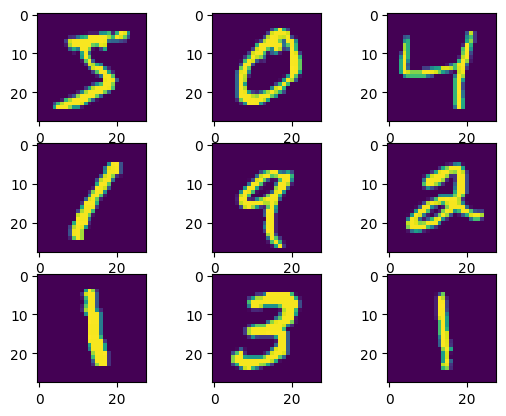

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(training_images[i])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Model Building

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)),
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'),
                                    Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2077 - accuracy: 0.9376
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0904 - accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0652 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0514 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [ ]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

1/1 [==============================] - 0s 97ms/step
[[8.5318304e-20 4.1618504e-09 1.8250291e-13 3.7385273e-14 1.1457048e-09
  2.9267987e-16 3.8910930e-19 1.0000000e+00 1.7314106e-12 1.8073418e-09]]


In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred


In [ ]:
iface = gradio.Interface(predict_image, inputs="sketchpad", outputs="label")

iface.launch(debug='True')


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 20ms/step
Keyboard interruption in main thread... closing server.


Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0206 - accuracy: 0.9940
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0165 - accuracy: 0.9949
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0145 - accuracy: 0.9960
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0157 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0148 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

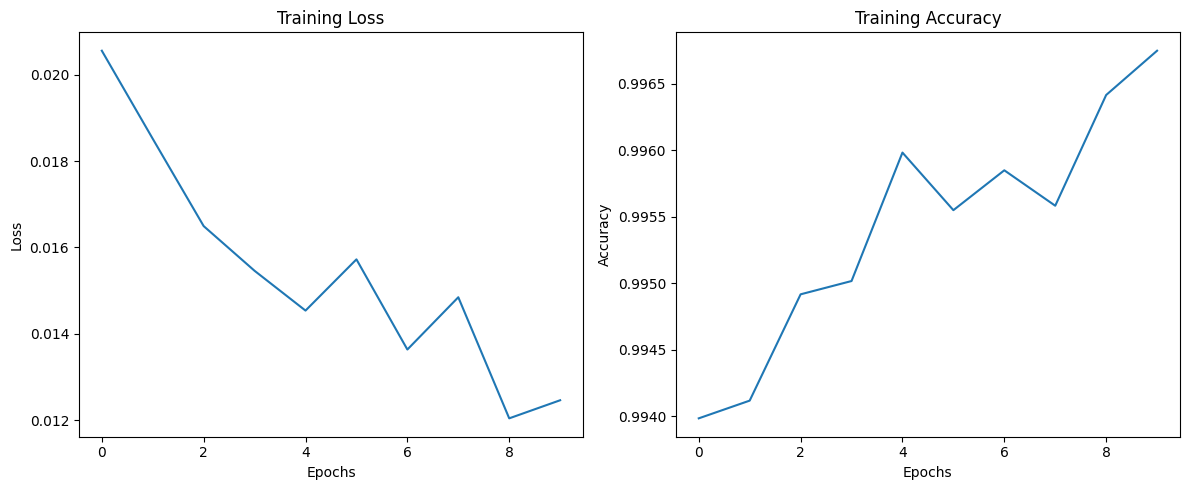

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Deployment Using GradioUI

In [ ]:
title = "Welcome on your first sketch recognition app!"

head = (
  "<center>"
  "<img src='file/mnist-classes.png' width=400>"
  "The robot was trained to classify numbers (from 0 to 9). To test it, write your number in the space provided."
  "</center>"
)


In [ ]:
def predict_digit(input_image):
    input_image = input_image / 255.0
    input_image = input_image.reshape(-1, 28, 28)

    predictions = model.predict(input_image)

    predicted_digit = np.argmax(predictions)
    predicted_digit_image = input_image.reshape(28, 28)

    return predicted_digit_image,predicted_digit

In [ ]:
interface = gr.Interface(fn=predict_digit, inputs="sketchpad", outputs=["image","text"], title=title, description=head,
    allow_screenshot=True,
    theme="dark")
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `allow_screenshot` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:332: UserWarning: Currently, only the 'default' theme is supported.
  warnings.warn("Currently, only the 'default' theme is supported.")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
def predict_digit(input_image):
    input_image = input_image / 255.0
    input_image = input_image.reshape(-1, 28, 28)

    predictions = model.predict(input_image)

    predicted_digit_label = np.argmax(predictions)

    digit_names = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine"
    }

    predicted_digit_name = digit_names[predicted_digit_label]

    predicted_digit_image = input_image.reshape(28, 28)

    return predicted_digit_image, predicted_digit_name, str(predicted_digit_label)

iface = gr.Interface(
    fn=predict_digit,
    inputs="sketchpad",
    outputs=["image", "text", "text"],
    title="Fun Digit Classifier",
    description="Draw a digit on the sketchpad, and our AI will predict it. Real-time training progress below.\n\n"
    "Utilizing Artificial Intelligence and Machine Learning, this project empowers you to draw a digit on the sketchpad. Our AI will predict the digit and display the result, showcasing the power of AI and ML in solving real-world problems. Try it out and see AI in action!\n\n"
    "This AI-powered digit classifier uses a trained model to recognize hand-drawn digits on the sketchpad.",
    allow_screenshot=True,
    sketchpad=True,
    sketchpad_color="#000000",
    sketchpad_height=200,
    sketchpad_width=200,
    sketchpad_clear_button=True,
    theme="light",
)

iface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `allow_screenshot` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'sketchpad': True, 'sketchpad_color': '#000000', 'sketchpad_height': 200, 'sketchpad_width': 200, 'sketchpad_clear_button': True}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:332: UserWarning: Currently, only the 'default' theme is supported.
  warnings.warn("Currently, only the 'default' theme is supported.")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>